In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy

# Rosenbrock function
f = lambda x,y: (1-x) ** 2 + 100*((y-x**2)**2)

##### ADAM

In [2]:
class Adam:

  def __init__(self):
      self.w = np.array([5,5]).astype(float)

  @property
  def func_value(self):
    x,y = self.w
    return (1-x) ** 2 + 100*((y-x**2)**2)

  def _steepest_direction(self,location):
    x,y = location
    return np.array([2*(x-1) - 400*x*(y - x**2), 200*(y-(x**2))])

  def _moment_update(self,order,decay,g, moment):
    return (1-decay) * (g**order) + decay * moment

  def run_epoch(self,n_epoch,alpha):
    a = alpha
    beta1 = .9
    beta2 = .999
    eta = 1e-8
    k = 0
    mu = np.zeros((2,))
    v = np.zeros((2,))

    self.fun_val = []
    self.loc = []

    for _ in range(n_epoch):
      
      # collect statistics
      k+=1
      current_location = copy.deepcopy(self.w)
      self.fun_val.append(self.func_value)
      self.loc.append(current_location)

      # compute momentum
      g = self._steepest_direction(current_location)
      mu = self._moment_update(1,beta1,g, mu)
      v = self._moment_update(2,beta2,g, v)

      # descent
      up = alpha * (mu/(1-beta1**k))
      down = eta + np.sqrt(v/(1-beta2**k))
      self.w -= up / down
    
    self.loc = np.array(self.loc)

(0, 1000)

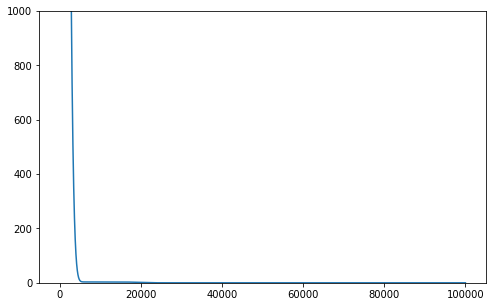

In [3]:
ad = Adam()
ad.run_epoch(100000,1e-3)

# cgd.w
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
ax.plot(ad.fun_val)
ax.set_ylim(0,1000)

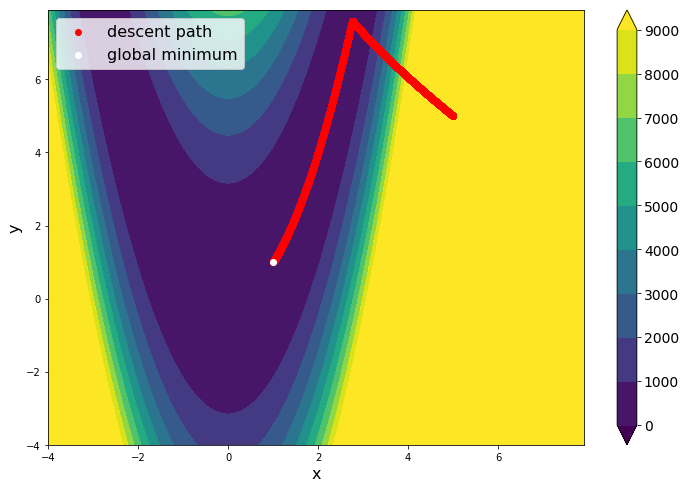

In [5]:
x = np.arange(-4, 8., 0.1)
y = np.arange(-4, 8., 0.1)

X, Y = np.meshgrid(x, y)

Z = f(X,Y)

fig, ax = plt.subplots(figsize=(12,8))

cf = ax.contourf(X,Y,Z,np.arange(0, 10000, 1000),extend='both')
ax.set_xlabel('x',fontsize = 16)
ax.set_ylabel('y',fontsize = 16)

cbar = fig.colorbar(cf, ax=ax)
cbar.ax.tick_params(labelsize=14) 


ax.scatter((ad.loc)[:,0],(ad.loc)[:,1],marker='o',color='red',label='descent path')
ax.scatter([1],[1],marker='o',color='white',label='global minimum')

ax.legend(prop={'size':16})

##### quasi_newton

In [6]:
from scipy.optimize import minimize

In [45]:
class q_newton:
    def __init__(self):
        pass

    def func_value(self,loc):
        """
        loc: np.array [a,b]
        """
        x,y = loc
        return (1-x) ** 2 + 100*((y-x**2)**2)
    
    def minimise(self,bounds,opt_restart):
        
        min_val = float('inf') 
        min_x = None

        # maximise acquisition function = minimise its negative (scipy has only minimiser)
        obj_func = lambda query: self.func_value(query)

        """
        randomly restart opt_restart times to maximise acquisition function

        x0 = initial guess/query
        """
        for x0 in np.random.uniform([4,4],[6,6],size=(opt_restart,2)):
            
#             print(x0)

            res = minimize(obj_func,x0=x0,bounds=bounds,method="L-BFGS-B")
    
                    
            if res.fun < min_val:
                min_val = res.fun
                min_x = res.x
                print("min",res.x)

        return min_val,min_x
    
newton_opt = q_newton()
bounds=np.array([[-2,6],[-2,6]])
opt_restart = 5

min [0.99999703 0.99999406]


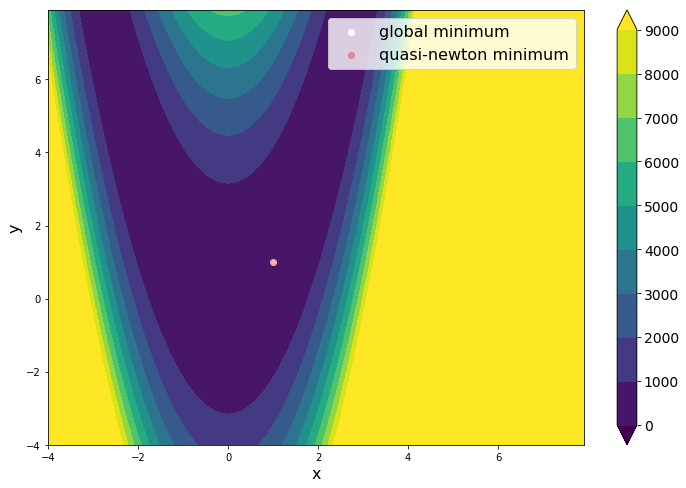

In [48]:
x = np.arange(-4, 8., 0.1)
y = np.arange(-4, 8., 0.1)

X, Y = np.meshgrid(x, y)

Z = f(X,Y)

fig, ax = plt.subplots(figsize=(12,8))

cf = ax.contourf(X,Y,Z,np.arange(0, 10000, 1000),extend='both')
ax.set_xlabel('x',fontsize = 16)
ax.set_ylabel('y',fontsize = 16)

ax.scatter([1],[1],marker='o',color='white',label='global minimum',alpha=1)


# opt
ny,nx =newton_opt.minimise(bounds,opt_restart)

loc1,loc2= nx

ax.scatter(loc1,loc2,marker='o',color='red',label='quasi-newton minimum',alpha=0.3)


cbar = fig.colorbar(cf, ax=ax)
cbar.ax.tick_params(labelsize=14) 
ax.legend(prop={'size':16})
plt.show()

In [10]:
a= np.array([[1,2],[3,4]])
a

array([[1, 2],
       [3, 4]])

In [11]:
x = np.array([2,3]).reshape(1,-1)
np.concatenate((a,x),axis=0)

array([[1, 2],
       [3, 4],
       [2, 3]])

In [31]:
for x0 in np.random.uniform(a[:,0],a[:,1],size=(1,2)):
    print(x0)

[1.70256265 3.44618491]


In [31]:
x = np.array([[1,2]])
x

array([[1, 2]])

In [32]:
x.ndim

2

In [1]:
import os

In [7]:
os.getcwd()

'/Users/michael/git_repo/Gaussian-Process'

In [17]:
os.chdir("GPs")
os.listdir()
os.chdir("..")

In [18]:
os.getcwd()

'/Users/michael/git_repo/Gaussian-Process'

array([[0.66151389, 0.7989756 , 0.7690722 , 0.94465385, 0.73342872],
       [0.79032017, 0.65472815, 0.79742566, 0.07495888, 0.08922303],
       [0.09378983, 0.53070829, 0.37787749, 0.94938076, 0.97163574],
       [0.48824329, 0.60229283, 0.71483855, 0.1644068 , 0.16738574]])